<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Исследование-площади,-цены,-числа-комнат,-высоты-потолков-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Исследование площади, цены, числа комнат, высоты потолков</a></span></li><li><span><a href="#Исследование-времени-продажи-квартиры" data-toc-modified-id="Исследование-времени-продажи-квартиры-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Исследование времени продажи квартиры</a></span></li><li><span><a href="#Удаление-редких-и-выбивающиеся-значения" data-toc-modified-id="Удаление-редких-и-выбивающиеся-значения-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Удаление редких и выбивающиеся значения</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Подсчет-средней-цены-квадратного-метра-в-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Подсчет-средней-цены-квадратного-метра-в-10-населённых-пунктов-с-наибольшим-числом-объявлений-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Подсчет средней цены квадратного метра в 10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Определение-центральной-зоны-г.-Санкт-Петербург" data-toc-modified-id="Определение-центральной-зоны-г.-Санкт-Петербург-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Определение центральной зоны г. Санкт-Петербург</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

### Описание данных

*Исследование объявлений о продаже квартир*

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Основная задача: установить параметры для определения рыночной стоимости объектов недвижимости в Санкт-Петербурге и его пригороде для построения автоматизированной системы слежения аномалий и мошеннической деятельности.

Описание данных:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [64]:
# импорт библиотеки pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#настройка pandas
pd.set_option('display.float_format', '{:,.2f}'.format)
# чтение файла с данными и сохранение в df 
server_path = '/datasets/real_estate_data.csv'
local_path = 'real_estate_data.csv' 
try:  
    df = pd.read_csv(server_path, sep='\t')     
except: 
    df = pd.read_csv(local_path, sep='\t')

# получение первых 10 строк таблицы df
pd.set_option('display.max_columns', None)
display(df.head(10))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


In [65]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 23699 строк и 22 столбца.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
В данных присутсвует большое количество пропущенных значений. Перед проведением исследовательского анализа данных следует изучить пропущенные значения.

## Предобработка данных

Определим количество пропусков в столбцах таблицы df.

In [66]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбцы с наибольшим количеством пропусков: ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Стоит разобраться с их причинами появления и по возможности заменить на подходящие.

Пропущенные значения столбца 'living_area' следует заменить на медианное значение столбца 'living_area'. Для этого переберем количества комнат столбца 'rooms' в цикле, чтобы заменить пропущенные значения на среднее жилой площади столбца 'living_area' по количеству комнат.

In [67]:
# группируем данные по количеству комнат, применяем метод transform, который разворачивает группировку обратно в 
#столбец с учетом полей, по которым была группировка
groups = df.groupby(['rooms'])['living_area'].transform('median')
#заполняем пропуски с помощью метода fillna
df['living_area'] = df['living_area'].fillna(groups)

In [68]:
# перебор количества комнат столбца ['rooms'] в цикле и замена пропущенных значений 
# на среднее жилой площади столбца ['living_area']
print('Пропуски до:', df['living_area'].isna().sum())
for item in df['rooms'].unique():
    median = df.loc[df['rooms'] == item, 'living_area'].median()
    print(item, median)
    df.loc[(df['living_area'].isna()) & (df['rooms'] == item), 'living_area'] = median
print('Пропуски после:', df['living_area'].isna().sum())

Пропуски до: 0
3 45.0
1 17.6
2 30.5
4 63.6
5 91.785
6 123.9
0 18.0
7 145.0
11 133.9
8 161.0
14 195.15
10 161.4
15 409.0
9 179.2
19 264.5
16 180.0
12 409.7
Пропуски после: 0


Аналогично пропущенные значения столбца 'kitchen_area' следует заменить на медианное значение столбца 'kitchen_area' с разбивкой по количеству комнат.

In [69]:
# группируем данные по количеству комнат, применяем метод transform, который разворачивает группировку обратно в 
#столбец с учетом полей, по которым была группировка
groups = df.groupby(['rooms'])['kitchen_area'].transform('median')
#заполняем пропуски с помощью метода fillna
df['kitchen_area'] = df['kitchen_area'].fillna(groups)

In [70]:
# перебор количества комнат столбца ['rooms'] в цикле и замена пропущенных значений 
# на среднее площади кухни столбца ['kitchen_area']
print('Пропуски до:', df['kitchen_area'].isna().sum())
for item in df['rooms'].unique():
    median = df.loc[df['rooms'] == item, 'kitchen_area'].median()
    print(item, median)
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == item), 'kitchen_area'] = median
print('Пропуски после:', df['kitchen_area'].isna().sum())

Пропуски до: 197
3 9.5
1 9.04
2 8.8
4 11.1
5 15.1
6 19.5
0 nan
7 20.0
11 12.600000000000001
8 25.0
14 21.25
10 19.8
15 100.0
9 14.3
19 27.6
16 13.0
12 112.0
Пропуски после: 197


После работы цикла остались пропущенные значения в столбце 'kitchen_area'. Проанализируем таблицу df, где значения столбца 'kitchen_area' - NaN.

In [71]:
# подсчёт пропусков для столбца 'kitchen_area'
df[df['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,"2,450,000.00",27.00,2017-03-30T00:00:00,0,NaN,24.00,15.50,2,NaN,True,False,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00
349,4,"2,320,000.00",25.00,2017-09-27T00:00:00,0,NaN,14.00,17.00,1,NaN,False,True,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
440,8,"2,480,000.00",27.11,2018-03-12T00:00:00,0,NaN,17.00,24.75,4,NaN,True,False,NaN,2.00,Санкт-Петербург,"38,171.00","15,015.00",0.00,NaN,2.00,982.00,64.00
508,0,"3,375,000.00",34.40,2017-03-28T00:00:00,0,NaN,26.00,24.30,19,NaN,False,True,NaN,1.00,посёлок Парголово,"53,115.00","19,292.00",0.00,NaN,1.00,593.00,430.00
608,2,"1,850,000.00",25.00,2019-02-20T00:00:00,0,NaN,10.00,18.00,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00
697,12,"2,500,000.00",24.10,2017-12-01T00:00:00,0,2.75,25.00,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.00
716,5,"1,500,000.00",17.00,2017-06-07T00:00:00,0,2.70,9.00,12.00,1,NaN,True,False,NaN,0.00,посёлок Шушары,"18,654.00","29,846.00",0.00,NaN,0.00,NaN,40.00
780,9,"2,600,000.00",26.10,2018-02-20T00:00:00,0,NaN,18.00,18.00,8,NaN,False,True,NaN,1.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
839,14,"1,900,000.00",35.00,2017-04-14T00:00:00,0,2.70,5.00,15.00,3,False,False,True,NaN,1.00,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.00
946,5,"2,200,000.00",23.00,2016-09-27T00:00:00,0,NaN,27.00,18.00,7,NaN,False,True,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.00


В таблице, где отсутствует значения столбца 'kitchen_area', количество комнат равно нулю. Можно сделать вывод, что данные квартиры относят к студийным. Квартира-студия — тип квартиры, основным отличием которого является отсутствие внутренних перегородок между кухней и жилыми комнатами или комнатой. В данном случае логично заменить оставшиеся пустые значения столбца 'kitchen_area' медианой по всему набору данных.

In [72]:
# замена пустых значения столбца 'kitchen_area' медианой 
print('Пропуски до:', df['kitchen_area'].isna().sum())
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
print('Пропуски после:', df['kitchen_area'].isna().sum())

Пропуски до: 197
Пропуски после: 0


Заменим пропущенные значения столбца 'is_apartment' на False, так как строки с пропущенными значениями столбца 'is_apartment' скорее всего относятся к клиентам, которые не знают что такое апартаменты, а следовательно ими не владеют.

In [73]:
# замена пустых значения столбца 'is_apartment' на False
print('Пропуски до:', df['is_apartment'].isna().sum())
df['is_apartment'] = df['is_apartment'].fillna(False)
print('Пропуски после:', df['is_apartment'].isna().sum())

Пропуски до: 20924
Пропуски после: 0


Наличие балкона в продаваемой квартире важный критерий при выставлении стоимости. Поэтому, если пользователь не вписал количество балконов, можно сделать вывод, что балкона в квартире нет. Заменим пропущенные значения столбца 'balcony' на ноль.

In [74]:
# замена пустых значения столбца 'balcony' на ноль
print('Пропуски до:', df['balcony'].isna().sum())
df['balcony'] = df['balcony'].fillna(0)
print('Пропуски после:', df['balcony'].isna().sum())

Пропуски до: 11519
Пропуски после: 0


Количество строк с незаполненными значениями столбца 'floors_total' составляет меньше 0.4% от общего количества строк таблицы. Значит следует их удалить. Аналогично поступим для стол столбца 'locality_name'.

In [75]:
# удаление строк с пустыми значениями столбца 'floors_total'
df.dropna(subset = ['floors_total'], inplace = True)
# удаление строк с пустыми значениями столбца 'locality_name'
df.dropna(subset = ['locality_name'], inplace = True)

Воспрользуемся методом describe и определим разброс значений для столбца 'ceiling_height'.

In [76]:
df['ceiling_height'].describe()

count   14,481.00
mean         2.77
std          1.26
min          1.00
25%          2.51
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Пропуски в столбце 'ceiling_height' следует заменить медианой, так как аномалии не влияют на медианные значения.

In [77]:
# замена пустых значения столбца 'ceiling_height' медианой 
print('Пропуски до:', df['ceiling_height'].isna().sum())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Пропуски после:', df['ceiling_height'].isna().sum())

Пропуски до: 9084
Пропуски после: 0


Заполним пустые значения столбцов 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' медианой по всему набору данных. Для это перезапишем столбец 'locality_name', удалив типы населенных пунков.

In [78]:
# перебор ['type_locality_name'] в цикле и удаление типов населенных пунктов
type_locality_name = ['посёлок ','городской посёлок ','деревня ','поселок городского типа ', 'поселок ','садовое товарищество ',
                      'село ','городской поселок ','поселок станции ', 'посёлок городского типа ','коттеджный поселок ',
                      'посёлок при железнодорожной станции ', ' ']
for name in type_locality_name:
    df['locality_name'] = df['locality_name'].str.replace(name, '')

In [79]:
columns_distance = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 
                    'ponds_around3000', 'ponds_nearest']
# замена пустых значений столбцов из списка columns_distance медианой по сгруппированным уникальным значениям столбца 
# из списка columns_distance
for col in columns_distance:
    print(col)
    print('Пропуски до:', df[col].isna().sum())
    for item in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == item, col].median()
        #print(item, median)
        df.loc[(df[col].isna()) & (df['locality_name'] == item), col] = median
    print('Пропуски после:', df[col].isna().sum())

airports_nearest
Пропуски до: 5524
Пропуски после: 5432
cityCenters_nearest
Пропуски до: 5501
Пропуски после: 5432
parks_around3000
Пропуски до: 5500
Пропуски после: 5432
parks_nearest
Пропуски до: 15535
Пропуски после: 5986
ponds_around3000
Пропуски до: 5500
Пропуски после: 5432
ponds_nearest
Пропуски до: 14529
Пропуски после: 5517


In [80]:
columns_distance = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 
                    'ponds_around3000', 'ponds_nearest']
# замена пустых значения столбцов из списка columns_distance медианой по всему столбцу
for col in columns_distance:
    print('Пропуски до:', df[col].isna().sum())
    df[col] = df[col].fillna(df[col].median())
    print('Пропуски после:', df[col].isna().sum())

Пропуски до: 5432
Пропуски после: 0
Пропуски до: 5432
Пропуски после: 0
Пропуски до: 5432
Пропуски после: 0
Пропуски до: 5986
Пропуски после: 0
Пропуски до: 5432
Пропуски после: 0
Пропуски до: 5517
Пропуски после: 0


Построим график зависимости числа пропусков в столбце 'days_exposition' от даты публикации объявления 'first_day_exposition'.

<AxesSubplot:xlabel='first_day_exposition'>

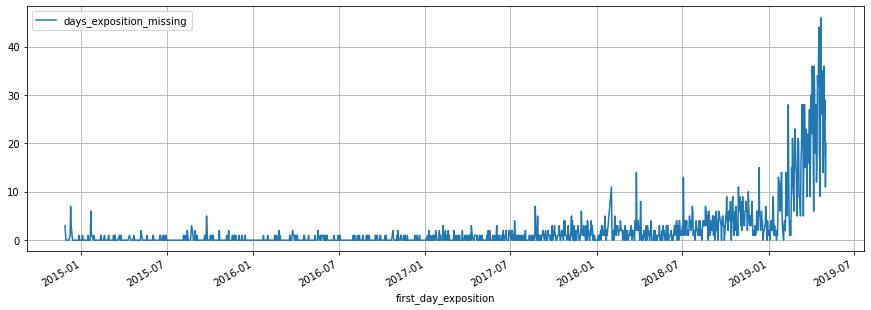

In [81]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
# задаем новый столбец, где определяем пропущена ли дата в столбце 'days_exposition'
df['days_exposition_missing'] = df['days_exposition'].isna().astype(int)
# строим график зависимости значений 'first_day_exposition' от числа пропусков
df.groupby('first_day_exposition').agg({'days_exposition_missing': 'sum'}).plot(grid=True, figsize=(15,5), legend=True)

Количество пропущенных значений в столбце 'days_exposition' начинает расти ближе к последним датам таблицы (декабрь 2019 г.), поэтому можно сделать вывод, что строки с пропущенными значениями в столбце 'days_exposition' - это незавершенные объявления. Заполнять или удалять данные с пропущенными значениями столбца 'days_exposition' не нужно. 

In [82]:
# подсчёт пропусков
df.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest              0
cityCenters_nearest           0
parks_around3000              0
parks_nearest                 0
ponds_around3000              0
ponds_nearest                 0
days_exposition            3171
days_exposition_missing       0
dtype: int64

Для подсчета и добавления в таблицу дня недели, месяца и года публикации объявления, необходимо перевести строки в даты, используем метод to_datetime().

In [83]:
# преобразование столбца DataFrame в datetime 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# преобразование столбца DataFrame в int
df['balcony'] = df['balcony'].astype(int)

**Вывод**

В ходе предобработки данных были выявлены возможные причины возникновения пропущенных значений. Большинство из пропущенных значений удалось заменить подходящими. Всего 134 строки были удалены.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу цену квадратного метра.

In [84]:
# добавление нового столбеца 'price_per_square_meter' в таблицу df
df['price_per_square_meter'] = df['last_price']/df['total_area']

Посчитаем и добавим в таблицу день недели, месяц и год публикации объявления.

In [85]:
# добавление нового столбеца 'weekday', 'month', 'year' в таблицу df
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Посчитаем и добавим в таблицу этаж квартиры. Для это сгруппируем этажи на 'первый', 'последний' и 'другой'.

In [86]:
# функция группировки этажей
def floors(row):
    if row['floor'] == 1:
        return 1
    elif row['floor'] == row['floors_total']:
        return 3
    else:
        return 2
# добавление нового столбеца 'floors_group' в таблицу df, где 1- первый этаж, 2-другой, 3-последний
df['floors_group'] = df.apply(floors, axis=1)

Посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [87]:
# добавление нового столбеца 'ratio_living_to_total' в таблицу df
df['ratio_living_to_total'] = df['living_area']/df['total_area']
# добавление нового столбеца 'ratio_kitchen_to_total' в таблицу df
df['ratio_kitchen_to_total'] = df['kitchen_area']/df['total_area']

Проверим выполнение операций по расчету и добавлению результатов в таблицу.

In [88]:
# вывод первых пяти строк таблицы df
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_missing,price_per_square_meter,weekday,month,year,floors_group,ratio_living_to_total,ratio_kitchen_to_total
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,1,"120,370.37",3,3,2019,2,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,Шушары,"12,817.00","18,603.00",0.00,460.00,0.00,584.50,81.00,0,"82,920.79",1,12,2018,1,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0,"92,785.71",3,8,2015,2,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,45.00,9,False,False,False,9.50,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,0,"408,176.10",4,7,2015,2,0.28,0.06
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0,"100,000.00",1,6,2018,2,0.32,0.41


**Вывод**

На данном этапе были посчитаны и добавлены в таблицу цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры (варианты — первый (1), последний (3), другой (2)), соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

###  Исследование площади, цены, числа комнат, высоты потолков

In [89]:
# импорт модуля pyplot библиотеки matplotlib
import matplotlib.pyplot as plt 

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

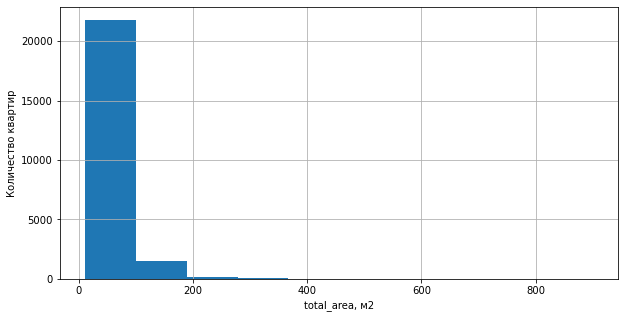

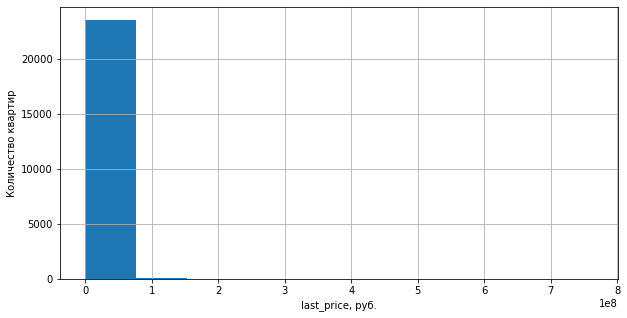

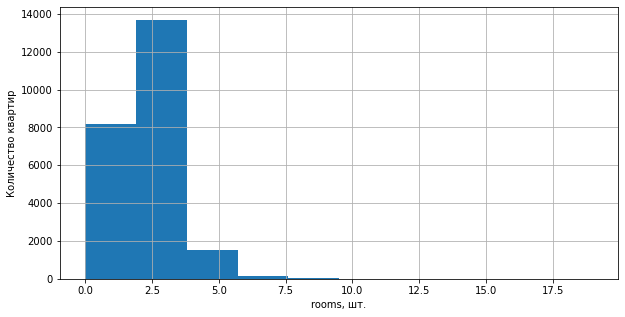

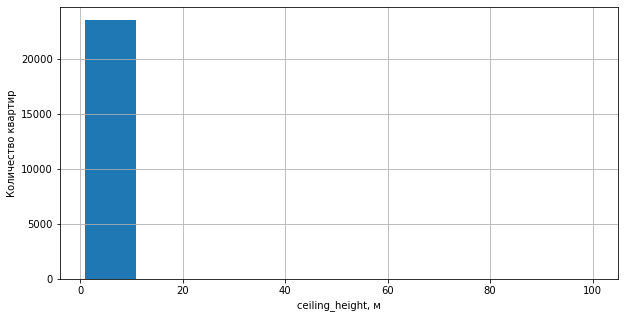

In [90]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
unit_dict = {'total_area' : 'м2', 'last_price': 'руб.', 'rooms': 'шт.', 'ceiling_height':'м'}
for item in columns:
    df[item].plot(kind='hist', grid=True, figsize=(10,5))
    plt.xlabel(f'{item}, {unit_dict[item]}')
    plt.ylabel('Количество квартир')
    plt.show()
    

In [91]:
# получение списока характерных значений, дающий представление о выборке, используя метод describe
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for item in columns:
    print(item)
    print(df[item].describe())
    print()

total_area
count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

last_price
count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

rooms
count   23,565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

ceiling_height
count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64



**Вывод**

Исследуя гистограммы и списоки характерных значений, имеем: 
1. В среднем квартиры, высталенные на продажу, имеют площадь примерно 50-60 квадратных метров; 
2. Средняя цена квратиры сильно отличнается от медианной, что свидетельсвтует, о большом разбросе цен; 
3. Более однородные данные в столбце 'rooms' и 'ceiling_height', но существует квартира с 19 комнатами и квартира с высотой потолка 100 м, что для исследования считается выбросомами, которые необходимо удалить.

###  Исследование времени продажи квартиры

Построим гистограмму времени продажи квартиры и посчитаем среднее и медиану.

<AxesSubplot:>

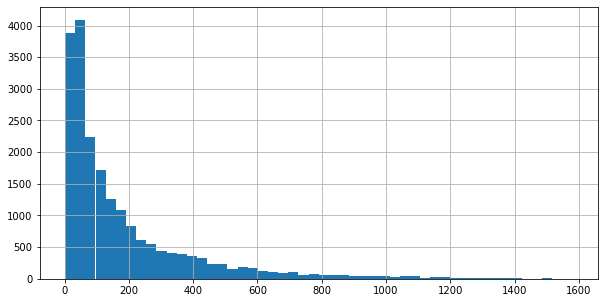

In [92]:
# гистограмма распределения объявлений по длительности экспозиции
df['days_exposition'].hist(bins=50, grid=True, figsize=(10,5))

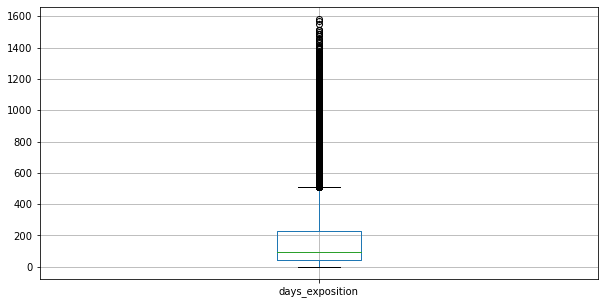

In [93]:
# отображение диаграммы ящик с усами
df.boxplot('days_exposition', figsize=(10,5))
plt.show()

In [94]:
# подсчет среднего значения и медианы методом describe
df['days_exposition'].describe()

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

In [95]:
# подсчет верхней границы для столбца 'days_exposition'
df['days_exposition'].quantile(0.99)

1067.1399999999994

In [96]:
# подсчет нижней границы для столбца 'days_exposition'
df['days_exposition'].quantile(0.01)

4.0

Использовав метод describe получили среднее значение, медиану, количество наблюдений в выборке и разброс их значений. 
Обычно продажа занимает примерно 95 дней. На диаграмме, построенной методом boxplot, видно, что есть выбросы.
«Усы» простираются верх от границ ящика на расстояние, равное 1,5 межквартильного размаха, а вниз меньше, чем расстояние, равное 1,5 межквартильного размаха. В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Поэтому необходимо удалить выбросы, то есть продажи, длительность которых осуществилась за 1067 дней и более. Можно считать, что продажа прошла быстро, если ее длительность составляет меньше 4 дней.

###  Удаление редких и выбивающиеся значения

Изучим разброс значений столбцов 'total_area', 'last_price', 'rooms', 'ceiling_height' при помощи метода boxplot.

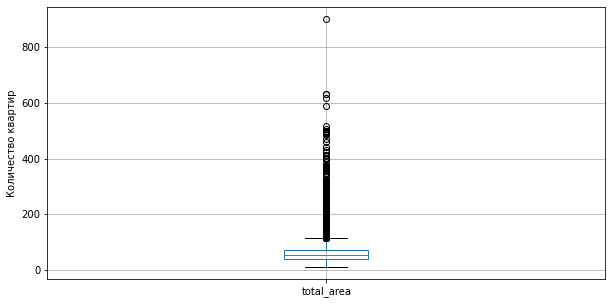

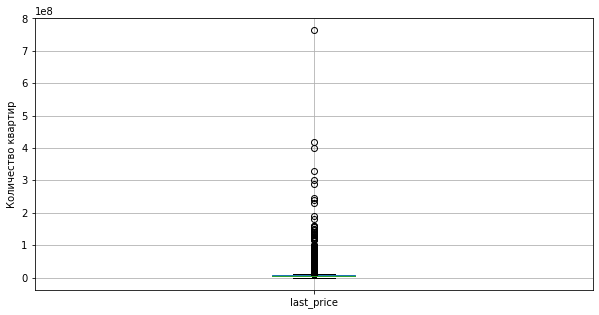

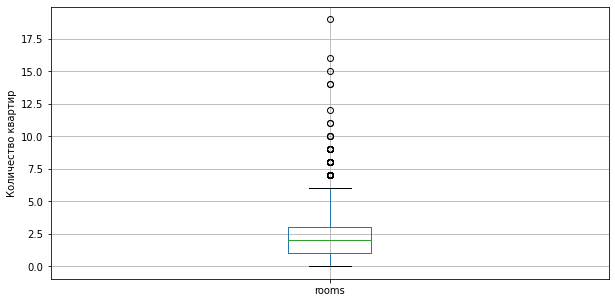

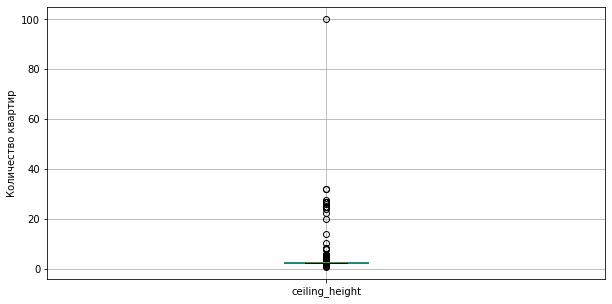

In [97]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for item in columns:
    df.boxplot(item, figsize=(10,5))
    plt.ylabel('Количество квартир')
    plt.show()

В данных распределения несимметричные, поэтому более точным будет искать границу через перцентили. На диаграммах видно, что выбросы сверху и снизу распределены только для столбца 'ceiling_height', поэтому установим верхнюю границу для столбцов 'total_area', 'last_price', 'rooms', 'ceiling_height' на уровне 99% перцентиль, а для столбца 'ceiling_height' еще и нижнюю границу на уровне 1%.

In [98]:
# удаление выбросов в столбах 'days_exposition', 'total_area', 'last_price', 'rooms', 'ceiling_height'
df_new = df[(df['days_exposition'] < df['days_exposition'].quantile(0.99)) & 
            (df['total_area'] < df['total_area'].quantile(0.99)) &
           (df['last_price'] < df['last_price'].quantile(0.99)) &
           (df['rooms'] < df['rooms'].quantile(0.99)) &
           (df['ceiling_height'] < df['ceiling_height'].quantile(0.99)) &
           (df['ceiling_height'] > df['ceiling_height'].quantile(0.01))]

In [99]:
# получение списока характерных значений, дающий представление о выборке, используя метод describe
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for item in columns:
    print(item)
    print(df_new[item].describe())
    print()

total_area
count   16,619.00
mean        56.45
std         23.28
min         12.00
25%         39.55
50%         51.00
75%         68.00
max        197.00
Name: total_area, dtype: float64

last_price
count       16,619.00
mean     5,612,924.98
std      3,788,857.02
min         12,190.00
25%      3,450,000.00
50%      4,600,000.00
75%      6,500,000.00
max     35,900,000.00
Name: last_price, dtype: float64

rooms
count   16,619.00
mean         1.93
std          0.90
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          4.00
Name: rooms, dtype: float64

ceiling_height
count   16,619.00
mean         2.70
std          0.15
min          2.51
25%          2.65
50%          2.65
75%          2.70
max          3.59
Name: ceiling_height, dtype: float64

days_exposition
count   16,619.00
mean       169.37
std        192.93
min          2.00
25%         45.00
50%         93.00
75%        222.00
max      1,066.00
Name: days_exposition, dtype: float64



In [100]:
# Таблица с результатами до обработки выбросов и после по значению стандартного отклонения
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
data = [[35.657060, 1.091093e+07, 1.078591, 0.991026, 219.732782],
        [23.279033, 3.788857e+06, 0.904739, 0.154513, 192.930572]]
new_std= pd.DataFrame(data = data, columns = columns)
display(new_std)

,total_area,last_price,rooms,ceiling_height,days_exposition
0,35.66,"10,910,930.00",1.08,0.99,219.73
1,23.28,"3,788,857.00",0.90,0.15,192.93


In [101]:
# получение характерных значений, дающий представление о выборке до обработки выбросов и после
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for item in columns:
    print(item)
    before = df[[item]].describe().rename(columns={item: 'before'})
    after = df_new[[item]].describe().rename(columns={item: 'after'})
    print(before.join(after))
    print()

total_area
         before     after
count 23,565.00 16,619.00
mean      60.32     56.45
std       35.66     23.28
min       12.00     12.00
25%       40.00     39.55
50%       52.00     51.00
75%       69.70     68.00
max      900.00    197.00

last_price
              before         after
count      23,565.00     16,619.00
mean    6,540,058.26  5,612,924.98
std    10,910,934.72  3,788,857.02
min        12,190.00     12,190.00
25%     3,400,000.00  3,450,000.00
50%     4,646,000.00  4,600,000.00
75%     6,790,000.00  6,500,000.00
max   763,000,000.00 35,900,000.00

rooms
         before     after
count 23,565.00 16,619.00
mean       2.07      1.93
std        1.08      0.90
min        0.00      0.00
25%        1.00      1.00
50%        2.00      2.00
75%        3.00      3.00
max       19.00      4.00

ceiling_height
         before     after
count 23,565.00 16,619.00
mean       2.72      2.70
std        0.99      0.15
min        1.00      2.51
25%        2.60      2.65
50%        2.65

**Вывод**

При анализе данных в столбцах 'total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition' были обнаружены большие по значению стандартные отклонения. Стандартное отклонение — значение, характеризующее разброс величин и показывающее, насколько значения в выборке отличаются от среднего арифметического. Если же стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы. После удаления выбросов в данных значения охарактеризованы более малым стандартным отклонением, что позволяет сделать вывод, что значения стали однороднее.

###  Факторы, влияющие на стоимость квартиры

 Определим факторы, которые больше всего влияют на стоимость квартиры.

In [102]:
# корреляция столбцов 'price_per_square_meter', 'total_area', 'rooms', 'cityCenters_nearest'
df_new[['price_per_square_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,price_per_square_meter,total_area,rooms,cityCenters_nearest
price_per_square_meter,1.00,0.16,-0.07,-0.27
total_area,0.16,1.00,0.79,-0.17
rooms,-0.07,0.79,1.00,-0.12
cityCenters_nearest,-0.27,-0.17,-0.12,1.00


Определим взаимосвязь цены квадратного метра от площади.

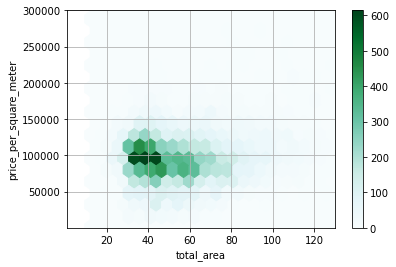

In [103]:
# диаграмма рассеяния 'total_area' и 'price_per_square_meter'
df_new.plot(x='total_area', y='price_per_square_meter', kind='hexbin', gridsize=35, sharex=False, grid=True)
plt.xlim(1,130)
plt.ylim(1,300000)
plt.show()

На графике видно, что между общей площадью и стоимостью квадратного метра существует обратная зависимость. Интенсивность зоны графика убывает в сторону больших значений общей площади. А значит, чем больше площадь квартиры, тем дешевле стоит квадратный метр.

Определим взаимосвязь цены квадратного метра от количества комнат.

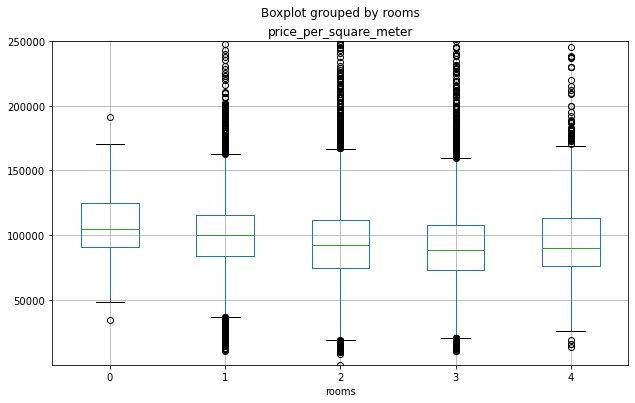

In [104]:
# диаграмма размаха для цены квадратного метра по сгруппированным количествам комнат 
df_new.boxplot(column='price_per_square_meter', by='rooms', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

Средняя цена за квадратный метр зависит от количества комнат. Наибольшая цена за квадратный метр составляет в однокомнатной квартире. Самый дешевый квадратный метр стоит в многокомнатных квартирах. Следовательно, чем больше комнат в квартире, тем дешевле квадратный метр.

Определим взаимосвязь цены квадратного метра от удалённости от центра.

In [105]:
# перевод 'cityCenters_nearest' в км и округление до целых значений
df_new['cityCenters_nearest'] = (df_new['cityCenters_nearest']/1000).round().astype(int)

In [106]:
# подсчет средней цены для каждого километра
df_price_per_km = df_new.pivot_table(index='cityCenters_nearest', values='price_per_square_meter')
df_price_per_km.head()

,price_per_square_meter
cityCenters_nearest,
0,"126,685.27"
1,"133,184.33"
2,"127,563.76"
3,"112,501.88"
4,"126,380.08"


<AxesSubplot:xlabel='cityCenters_nearest'>

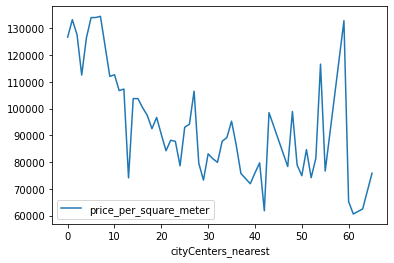

In [107]:
# демонстрация графика, показывающего зависимость цены от удалённости от центра
df_price_per_km.plot()

На графике наблюдается тренд к уменьшению стоимости квадратного метра при удалении от центра города.

Определим зависимость цены от того, на каком этаже расположена квартира: первом(1), последнем(3) или другом(2).

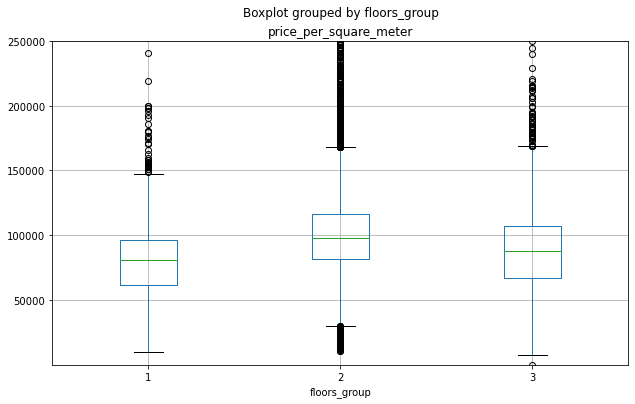

In [108]:
# характеристики распределения для столбца 'floors_group'
df_new.boxplot(column='price_per_square_meter', by='floors_group', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

Из диаграммы размаха следует, что самые дешевые квартиры предлагаются на первых этажах и последних. Наибольшую стоимость за квадратный метр имеют остальные варианты. 

Определим зависимость цены от даты размещения: дня недели, месяца и года.

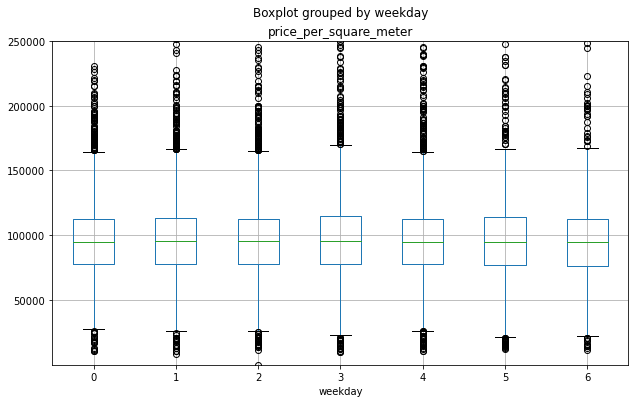

In [109]:
# характеристики распределения для столбца 'weekday'
df_new.boxplot(column='price_per_square_meter', by='weekday', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

Анализируя распределения для столбца 'weekday' можно сделать вывод, что день недели размещения объявления не влияет на стоимость квартиры. Медианные значения по сгруппированным дням недели находятся практически на одном уровне.

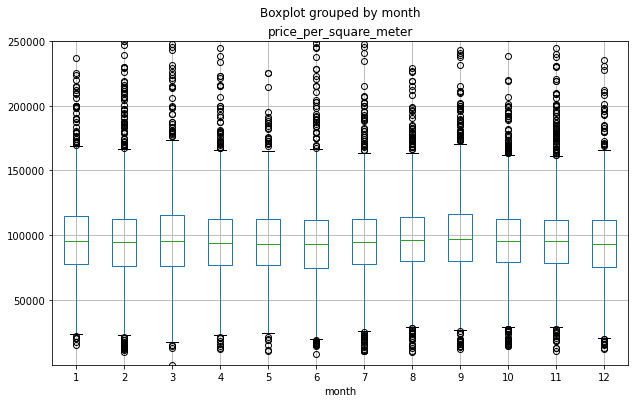

In [110]:
# характеристики распределения для столбца 'month'
df_new.boxplot(column='price_per_square_meter', by='month', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

С начала года наблюдается отрицательный тренд по средней стоимости квадратного метра до начала лета. С июня по сентябрь средняя стоимость квадратного метра растет. После сентября вновь наблюдается снижение стоимости до конца года. Можно сделать вывод, что самые дорогие квадратные метры под конец лета.

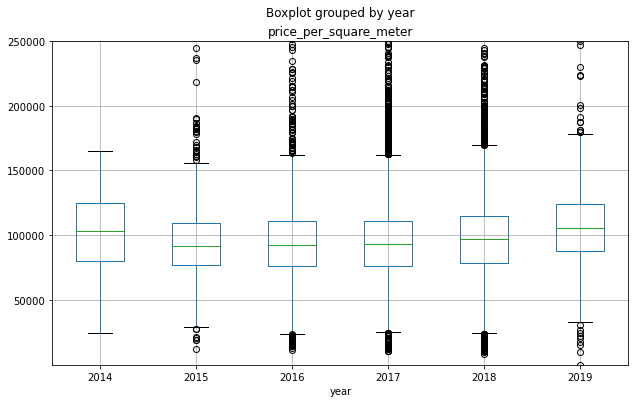

In [111]:
# характеристики распределения для столбца 'year'
df_new.boxplot(column='price_per_square_meter', by='year', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

По сравнению с 2014 г. средняя цена квадратного метра 2015 г. снизилась. В период 2015-2019 г. стоимость квадратного метра расла. И лишь в 2019 г. привысила  отметку 2014 г.

**Вывод**

Факторы, которые больше всего влияют на стоимость квартиры: 
1.	Площадь квартиры (чем больше площадь квартиры, тем дешевле стоит квадратный метр)
2.	Число комнат (чем больше комнат в квартире, тем дешевле квадратный метр)
3.	Удаленность от центра города (чем дальше от центра квартира, тем меньше стоимости квадратного метра)
4.	Этаж квартиры (наименьшую стоимость за квадратный метр имеют квартиры на первом и последнем этаже)
5.	Месяц публикации объявления (самые дорогие квадратные метры выставлены под конец лета)

###  Подсчет средней цены квадратного метра в 10 населённых пунктов с наибольшим числом объявлений

In [112]:
# отбор населённых пунктов с наибольшим числом объявлений
top_10 = df_new['locality_name'].value_counts().head(10).index
# создание df населённых пунктов с наибольшим числом объявлений
df_top_10 = df_new.query('locality_name in @top_10')

In [113]:
# создание сводной таблицы по средней стоимости квадратного метра в населенных пунках
df_top_10_stat = df_top_10.pivot_table(index='locality_name', values='price_per_square_meter')
# сортировка сводной таблицы по столбцу 'price_per_square_meter' в убывающем порядке
df_top_10_stat.sort_values(by = 'price_per_square_meter', ascending = False)

,price_per_square_meter
locality_name,
Санкт-Петербург,"110,404.36"
Пушкин,"103,535.58"
Кудрово,"94,270.85"
Парголово,"89,627.04"
Мурино,"85,685.26"
Шушары,"77,739.19"
Колпино,"74,713.64"
Всеволожск,"68,805.37"
Гатчина,"68,141.79"


**Вывод**

Максимальная цена квадратного метра в г. Санкт-Петербург, самая низкая цена квадратного метра из 10 населённых пунктов с наибольшим числом объявлений в г. Выборг.

###  Определение центральной зоны г. Санкт-Петербург

In [114]:
# выделение квартир в Санкт-Петербурге
df_spb = df_new[df_new['locality_name'] == 'Санкт-Петербург']

In [115]:
# округление столбца 'cityCenters_nearest' до целых значений
df_spb['cityCenters_nearest_km'] = (df_spb['cityCenters_nearest']).round().astype(int)

In [116]:
# подсчет средней цены для каждого километра
df_spb_price_per_kilometer = df_spb.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter')
df_spb_price_per_kilometer.head()

,price_per_square_meter
cityCenters_nearest_km,
0,"126,685.27"
1,"133,184.33"
2,"127,563.76"
3,"112,501.88"
4,"126,380.08"


<AxesSubplot:xlabel='cityCenters_nearest_km'>

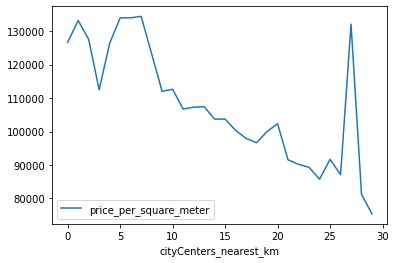

In [117]:
# демонстрация графика, показывающего зависимость цены от удалённости от центра
df_spb_price_per_kilometer.plot()

**Вывод**

На графике видно, что резкий спад начинается после 7 км, следовательно, территория в радиусе 7 км от центра г. Санкт-Петербург является центральная зоной.

* Проанализируем центральную территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [118]:
# корреляция столбцов 'price_per_square_meter', 'total_area', 'rooms', 'cityCenters_nearest' для центральной зоны
df_spb.query('cityCenters_nearest_km < 7')[['price_per_square_meter', 'total_area', 'rooms', 'ceiling_height']].corr()

,price_per_square_meter,total_area,rooms,ceiling_height
price_per_square_meter,1.00,-0.04,-0.25,-0.01
total_area,-0.04,1.00,0.73,0.19
rooms,-0.25,0.73,1.00,0.19
ceiling_height,-0.01,0.19,0.19,1.00


Выделим сегмент квартир в центре, расстояние которых меньше 7 км от центра г. Санкт-Петербург, и определим взаимосвязь цены квадратного метра от площади центральной зоне.

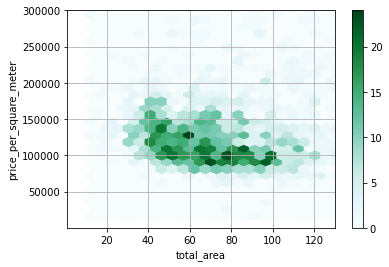

In [119]:
# диаграмма рассеяния 'total_area' и 'price_per_square_meter' для центральной зоны
df_spb.query('cityCenters_nearest_km < 7').plot(x='total_area', y='price_per_square_meter', kind='hexbin', 
                                                gridsize=35, sharex=False, grid=True)
plt.xlim(1,130)
plt.ylim(1,300000)
plt.show()

В центре сохраняется тенденция снижения стоимости квадратного при увеличении общей площади.

Определим взаимосвязь цены квадратного метра от количества комнат центральной зоне.

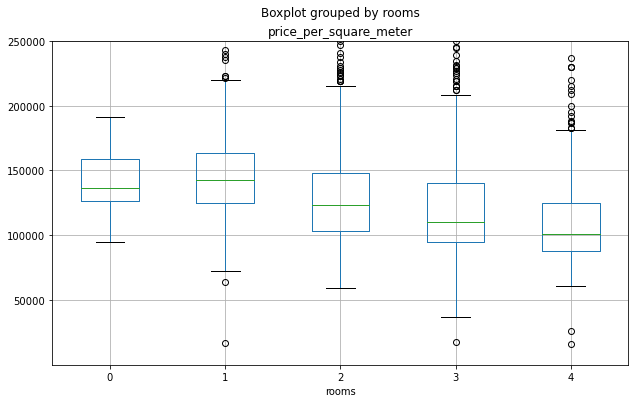

In [120]:
# диаграмма размаха для цены квадратного метра по сгруппированным количествам комнат в центральной зоне
df_spb.query('cityCenters_nearest_km < 7').boxplot(column='price_per_square_meter', by='rooms', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

В центре стоимость квадратного метра студии меньше, чем у однокомнатной квартиры, в отличие от общей статистики. Наибольшая цена за квадратный метр составляет в однокомнатной квартире. Самый дешевый квадратный метр стоит в многокомнатных квартирах. В центральной зоне наблюдается более выраженный спад стоимости квадратного метра с увеличением количества комнат.

Определим взаимосвязь цены квадратного метра от этажа квартиры.

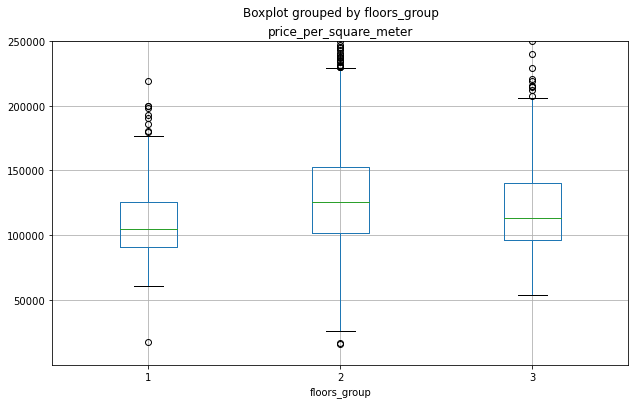

In [121]:
# характеристики распределения для столбца 'floors_group' для центральной зоны
df_spb.query('cityCenters_nearest_km < 7').boxplot(column='price_per_square_meter', by='floors_group', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

Из диаграммы размаха следует, что самые дешевые квартиры на первых этажах и последних. Зависимость стоимости квадратного метра совпадает с общей статистикой.

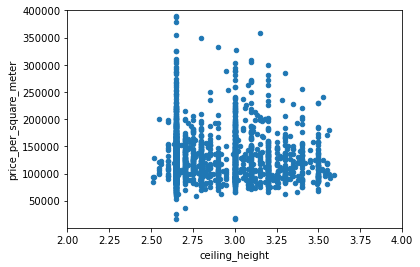

In [122]:
# диаграмма рассеяния 'ceiling_height' и 'price_per_square_meter' для центральной зоны
df_spb.query('cityCenters_nearest_km < 7').plot(x='ceiling_height', y='price_per_square_meter', kind='scatter')
plt.xlim(2,4)
plt.ylim(1,400000)
plt.show()

На графике виден тренд уменьшения стоимости квадратного метра с увеличением высоты потолков, возможно, такое явление связано с тем, что в данных в столбце 'ceiling_height' изначально было обнаружено 9195 пропусков из 23699 строк и, заполнив пустые значения столбца 'ceiling_height' медианой по всему набору данных, медиана высоты потолка в центральной зоне г. Санкт-Петербург сместилась ниже реальных значений.

* Проанализируем факторы, которые влияют на стоимость квартиры в центральной зоне (число комнат, этаж, удалённость от центра, дата размещения объявления).

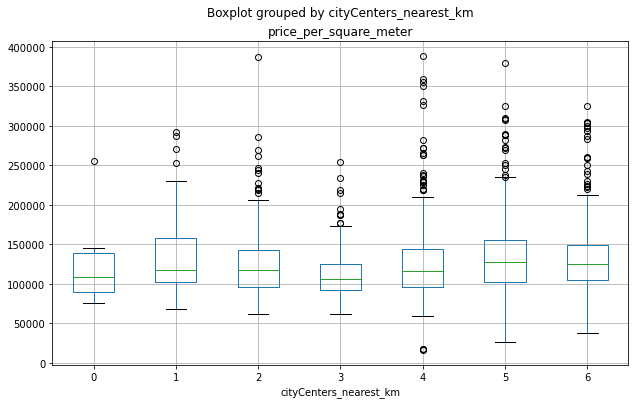

In [123]:
# диаграмма размаха для цены квадратного метра по сгруппированным километрам в центральной зоне
df_spb.query('cityCenters_nearest_km < 7').boxplot(column='price_per_square_meter', by='cityCenters_nearest_km', 
                                                   figsize=(10, 6))
plt.show()

В центральной зоне цена квадратного метра находится на одном уровне. Исключение составляет область на расстоянии 3 км, которая обусловлена наличием промышленной зоны в центре г. Санкт-Петербург.

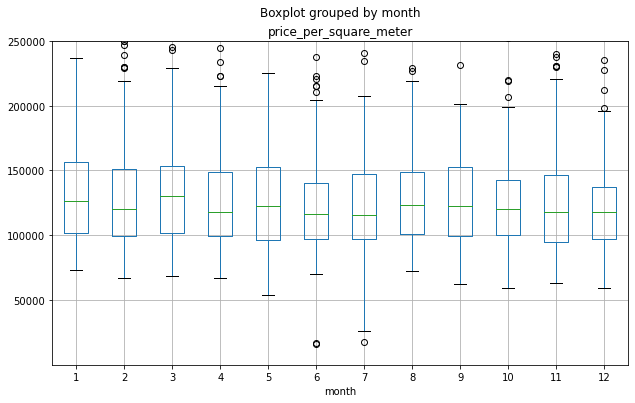

In [124]:
# характеристики распределения для столбца 'month' в центральной зоне
df_spb.query('cityCenters_nearest_km < 7').boxplot(column='price_per_square_meter', by='month', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

В начале года цена квадратного метра меняется более скачкообразно, однако, тенденция увеличения цены в период с июня по сентябрь и уменьшения цены с сентября по конец года сохраняется.

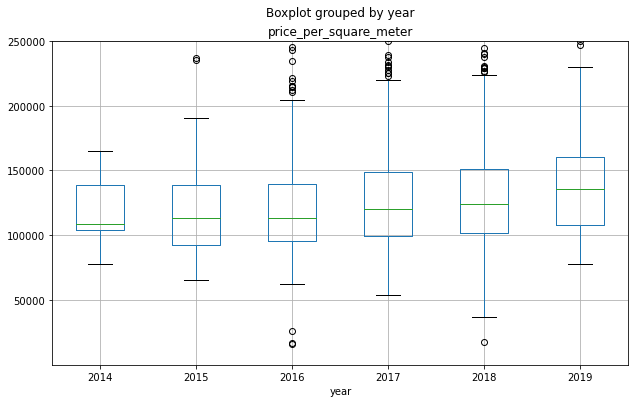

In [125]:
# характеристики распределения для столбца 'year' в центральной зоне
df_spb.query('cityCenters_nearest_km < 7').boxplot(column='price_per_square_meter', by='year', figsize=(10, 6))
plt.ylim(1,250000)
plt.show()

В отличие от общей статистики цена квадратного метра в центральной зоне постоянно растет. Рост цен в 2018 и 2019 г. более ярко выражен.

Факторы, которые больше всего влияют на стоимость квартиры в центральной зоне: 
1.	Площадь квартиры (чем больше площадь квартиры, тем дешевле стоит квадратный метр)
2.	Этаж квартиры (наименьшую стоимость за квадратный метр имеют квартиры на первом и последнем этаже)
3.	Месяц публикации объявления (самые дорогие квадратные метры выставлены под конец лета)
4. Год продажи (с каждым годоцены на квадратный метр увеличиваются)

<AxesSubplot:ylabel='Frequency'>

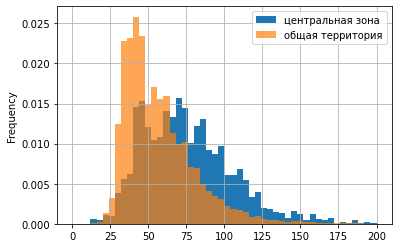

In [126]:
df_new.query('locality_name == "Санкт-Петербург" & cityCenters_nearest < 7')['total_area'].plot(x='total_area', 
                                        y='price_per_square_meter', kind='hist', bins=50, range=(0, 200), grid=True, 
                                        density=True, label='центральная зона', legend=True)
df_new['total_area'].plot(x='total_area', y='price_per_square_meter',  alpha=0.7,
                          kind='hist', bins=50, range=(0, 200), grid=True, density=True, label='общая территория', legend=True)


## Общий вывод

В ходе анализа установлены следующие основные выводы:
1. В центре сохраняется тенденция снижения стоимости квадратного при увеличении общей площади;
2. В центральной зоне наблюдается более выраженный спад стоимости квадратного метра с увеличением количества комнат;
3. Зависимость стоимости квадратного метра от этажа квартиры сохраняется на территории г. Санкт-Петербург и его пригородной области;
4. Тенденция увеличения цены в период с июня по сентябрь и уменьшения цены с сентября по конец года также сохраняется в представленных статистических данных.